In [69]:
# Import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path

print(os.getcwd())

/Users/alexandrachandler/Desktop/ut/Project 1


In [71]:
print(df_2020.columns)

Index(['State', 'Year', 'Number of CoCs', 'Overall Homeless - Female',
       'Overall Homeless - Male', 'Overall Homeless - Transgender',
       'Overall Homeless - Gender Non-Conforming',
       'Sheltered Total Homeless - Female', 'Sheltered Total Homeless - Male',
       'Sheltered Total Homeless - Transgender',
       'Sheltered Total Homeless - Gender Non-Conforming',
       'Unsheltered Homeless - Female', 'Unsheltered Homeless - Male',
       'Unsheltered Homeless - Transgender',
       'Unsheltered Homeless - Gender Non-Conforming'],
      dtype='object')


In [114]:
# Filter by rows (only CA and TX)
df_2020 = pd.read_excel('/Users/alexandrachandler/Desktop/ut/Project 1/demo_state_homeless2.xlsx', sheet_name="2020")
#ca_tx_2020 = df[(df['State'] == 'CA') | (df['State'] == 'TX')]
#df_filtered_2020 = ca_tx_2020[columns_to_keep]

df_2019 = pd.read_excel('/Users/alexandrachandler/Desktop/ut/Project 1/demo_state_homeless2.xlsx', sheet_name="2019")
#ca_tx_2019 = df[(df['State'] == 'CA') | (df['State'] == 'TX')]
#df_filtered_2019 = ca_tx_2019[columns_to_keep]

df_2018 = pd.read_excel('/Users/alexandrachandler/Desktop/ut/Project 1/demo_state_homeless2.xlsx', sheet_name="2018")
#ca_tx_2018 = df[(df['State'] == 'CA') | (df['State'] == 'TX')]
#df_filtered_2018 = ca_tx_2018[columns_to_keep]

df_2017 = pd.read_excel('/Users/alexandrachandler/Desktop/ut/Project 1/demo_state_homeless2.xlsx', sheet_name="2017")
#ca_tx_2017 = df[(df['State'] == 'CA') | (df['State'] == 'TX')]
#df_filtered_2017 = ca_tx_2017[columns_to_keep]

df_2016 = pd.read_excel('/Users/alexandrachandler/Desktop/ut/Project 1/demo_state_homeless2.xlsx', sheet_name="2016")
#ca_tx_2016 = df[(df['State'] == 'CA') | (df['State'] == 'TX')]
#df_filtered_2016 = ca_tx_2016[columns_to_keep]

df_2015 = pd.read_excel('/Users/alexandrachandler/Desktop/ut/Project 1/demo_state_homeless2.xlsx', sheet_name="2015")
#ca_tx_2015 = df[(df['State'] == 'CA') | (df['State'] == 'TX')]
#df_filtered_2015 = ca_tx_2015[columns_to_keep]

# Combine rows into a few datasheet
combined_data = pd.concat([df_2020, 
                           df_2019,
                           df_2018, 
                           df_2017, 
                           df_2016,
                           df_2015], ignore_index=True)

combined_data

,State,Year,Number of CoCs,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,Overall Homeless - Gender Non-Conforming,Sheltered Total Homeless - Female,Sheltered Total Homeless - Male,Sheltered Total Homeless - Transgender,Sheltered Total Homeless - Gender Non-Conforming,Unsheltered Homeless - Female,Unsheltered Homeless - Male,Unsheltered Homeless - Transgender,Unsheltered Homeless - Gender Non-Conforming,Non-Conforming NA,Non-Conforming NA.1,Non-Conforming NA.2
0,CA,2020,44,53505,105737,1601,705.0,20943,26502,330,113.0,32562,79235,1271,592.0,NaN,NaN,NaN
1,TX,2020,11,10080,17067,61,21.0,6470,7512,28,7.0,3610,9555,33,14.0,NaN,NaN,NaN
2,CA,2019,44,50467,98404,1764,643.0,18737,23807,236,66.0,31730,74597,1528,577.0,NaN,NaN,NaN
3,TX,2019,11,9404,16361,66,17.0,6758,7831,34,3.0,2646,8530,32,14.0,NaN,NaN,NaN
4,CA,2018,43,42491,85810,1252,419.0,17599,22579,215,36.0,24892,63231,1037,383.0,NaN,NaN,NaN
5,TX,2018,11,9468,15761,48,33.0,6955,7777,32,12.0,2513,7984,16,21.0,NaN,NaN,NaN
6,CA,2017,43,42750,87609,793,380.0,18387,23994,221,34.0,24363,63615,572,346.0,NaN,NaN,NaN
7,TX,2017,11,8861,14546,47,94.0,6864,8096,28,67.0,1997,6450,19,27.0,NaN,NaN,NaN
8,CA,2016,43,39175,78121,846,NaN,16765,22822,165,NaN,22410,55299,681,NaN,NaN,NaN,NaN
9,TX,2016,11,9334,13739,49,NaN,7471,8717,26,NaN,1863,5022,23,NaN,NaN,NaN,NaN


In [97]:
combined_data.columns

Index(['State', 'Year', 'Number of CoCs', 'Overall Homeless - Female',
       'Overall Homeless - Male', 'Overall Homeless - Transgender',
       'Overall Homeless - Gender Non-Conforming',
       'Sheltered Total Homeless - Female', 'Sheltered Total Homeless - Male',
       'Sheltered Total Homeless - Transgender',
       'Sheltered Total Homeless - Gender Non-Conforming',
       'Unsheltered Homeless - Female', 'Unsheltered Homeless - Male',
       'Unsheltered Homeless - Transgender',
       'Unsheltered Homeless - Gender Non-Conforming', 'Non-Conforming NA',
       'Non-Conforming NA.1', 'Non-Conforming NA.2'],
      dtype='object')

In [115]:
combined_data.drop(columns=['Overall Homeless - Gender Non-Conforming',
                            'Sheltered Total Homeless - Gender Non-Conforming',
                            'Unsheltered Homeless - Gender Non-Conforming', 'Number of CoCs',
                            'Non-Conforming NA', 
                            'Non-Conforming NA.1', 'Non-Conforming NA.2'], inplace=True)

In [117]:
# Sort combined_data by like state
custom_order = ['CA', 'TX']
combined_data['State'] = pd.Categorical(combined_data['State'], categories=custom_order, ordered=True)
combined_data = combined_data.sort_values('State')
combined_data

,State,Year,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,Sheltered Total Homeless - Female,Sheltered Total Homeless - Male,Sheltered Total Homeless - Transgender,Unsheltered Homeless - Female,Unsheltered Homeless - Male,Unsheltered Homeless - Transgender
0,CA,2020,53505,105737,1601,20943,26502,330,32562,79235,1271
2,CA,2019,50467,98404,1764,18737,23807,236,31730,74597,1528
4,CA,2018,42491,85810,1252,17599,22579,215,24892,63231,1037
6,CA,2017,42750,87609,793,18387,23994,221,24363,63615,572
8,CA,2016,39175,78121,846,16765,22822,165,22410,55299,681
10,CA,2015,38676,76545,517,17910,23981,148,20766,52564,369
1,TX,2020,10080,17067,61,6470,7512,28,3610,9555,33
3,TX,2019,9404,16361,66,6758,7831,34,2646,8530,32
5,TX,2018,9468,15761,48,6955,7777,32,2513,7984,16
7,TX,2017,8861,14546,47,6864,8096,28,1997,6450,19


In [118]:
tx = combined_data.loc[combined_data['State'] == 'TX']
ca = combined_data.loc[combined_data['State'] == 'CA']

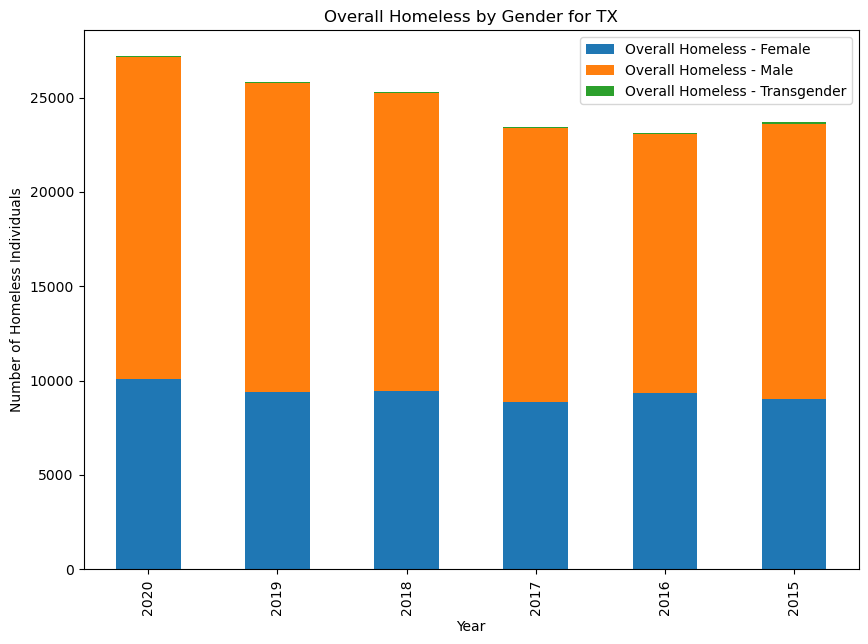

In [134]:
import matplotlib.pyplot as plt

# Select the necessary columns
gender_data_tx = tx[['State', 'Year', 'Overall Homeless - Female', 'Overall Homeless - Male', 'Overall Homeless - Transgender']]

# Plotting the stacked bar graph
gender_data_tx.plot(kind='bar', x = 'Year',stacked=True, figsize=(10,7))
plt.title('Overall Homeless by Gender for TX')
plt.ylabel('Number of Homeless Individuals')
plt.xlabel('Year')
plt.show()

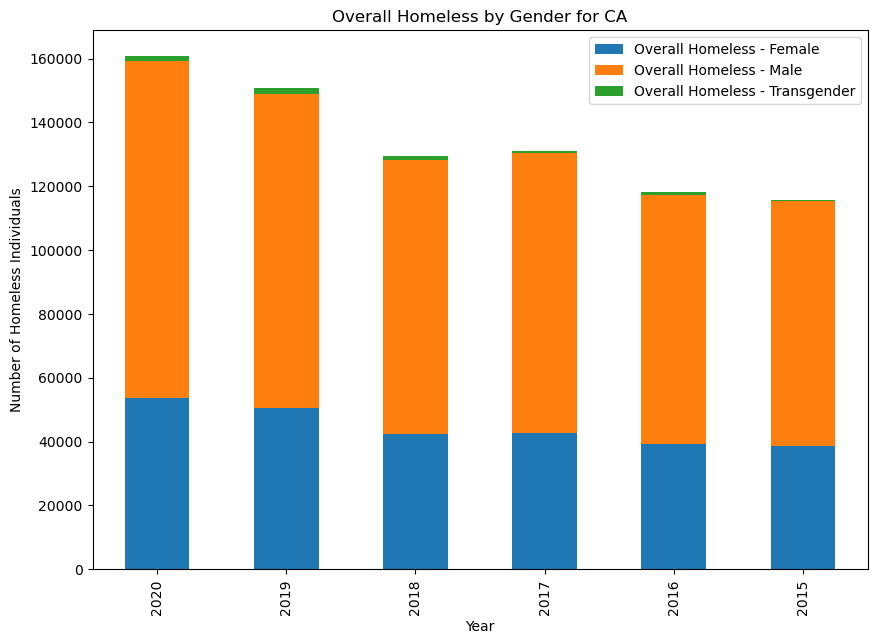

In [135]:
import matplotlib.pyplot as plt

# Select the necessary columns
gender_data_ca = ca[['State', 'Year', 'Overall Homeless - Female', 'Overall Homeless - Male', 'Overall Homeless - Transgender']]

# Plotting the stacked bar graph
gender_data_ca.plot(kind='bar', x = 'Year',stacked=True, figsize=(10,7))
plt.title('Overall Homeless by Gender for CA')
plt.ylabel('Number of Homeless Individuals')
plt.xlabel('Year')
plt.show()

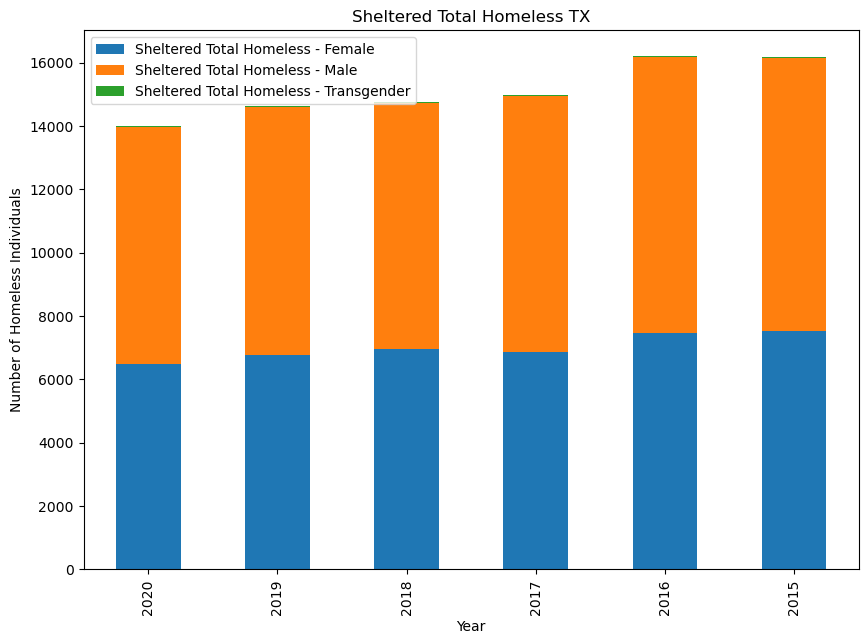

In [128]:
import matplotlib.pyplot as plt

# Select the necessary columns
gender_data_tx = tx[['State', 'Year', 'Sheltered Total Homeless - Female', 'Sheltered Total Homeless - Male', 'Sheltered Total Homeless - Transgender']]

# Plotting the stacked bar graph
gender_data_tx.plot(kind='bar', x = 'Year',stacked=True, figsize=(10,7))
plt.title('Sheltered Total Homeless TX')
plt.ylabel('Number of Homeless Individuals')
plt.xlabel('Year')
plt.show()

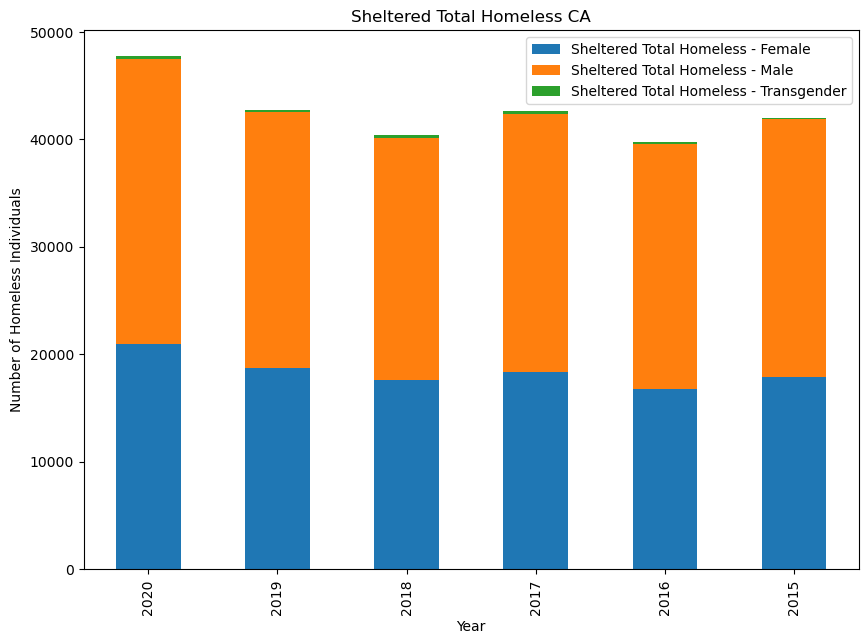

In [137]:
import matplotlib.pyplot as plt

# Select the necessary columns
gender_data_ca = ca[['State', 'Year', 'Sheltered Total Homeless - Female', 'Sheltered Total Homeless - Male', 'Sheltered Total Homeless - Transgender']]

# Plotting the stacked bar graph
gender_data_ca.plot(kind='bar', x = 'Year',stacked=True, figsize=(10,7))
plt.title('Sheltered Total Homeless CA')
plt.ylabel('Number of Homeless Individuals')
plt.xlabel('Year')
plt.show()

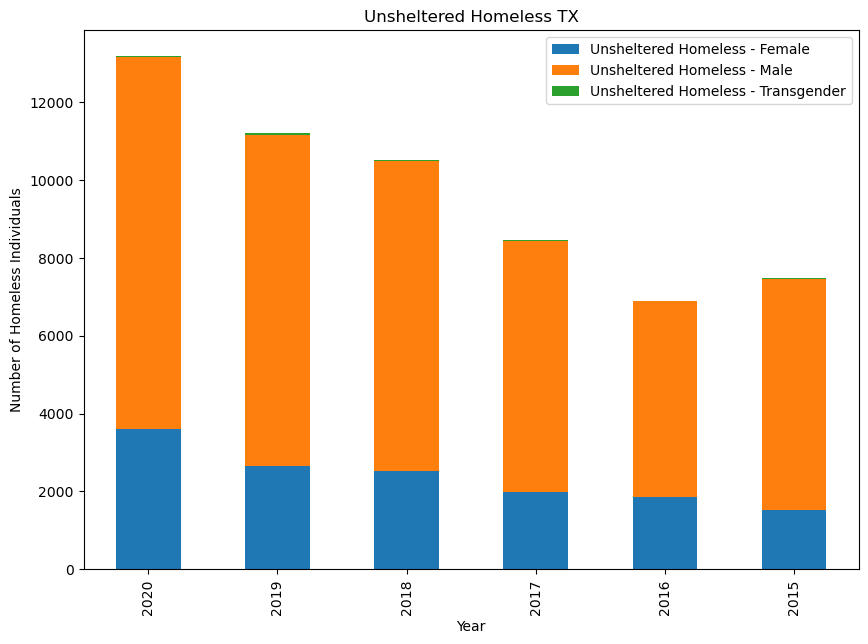

In [138]:
import matplotlib.pyplot as plt

# Select the necessary columns
gender_data_tx = tx[['State', 'Year', 'Unsheltered Homeless - Female', 'Unsheltered Homeless - Male', 'Unsheltered Homeless - Transgender']]

# Plotting the stacked bar graph
gender_data_tx.plot(kind='bar', x = 'Year',stacked=True, figsize=(10,7))
plt.title('Unsheltered Homeless TX')
plt.ylabel('Number of Homeless Individuals')
plt.xlabel('Year')
plt.show()

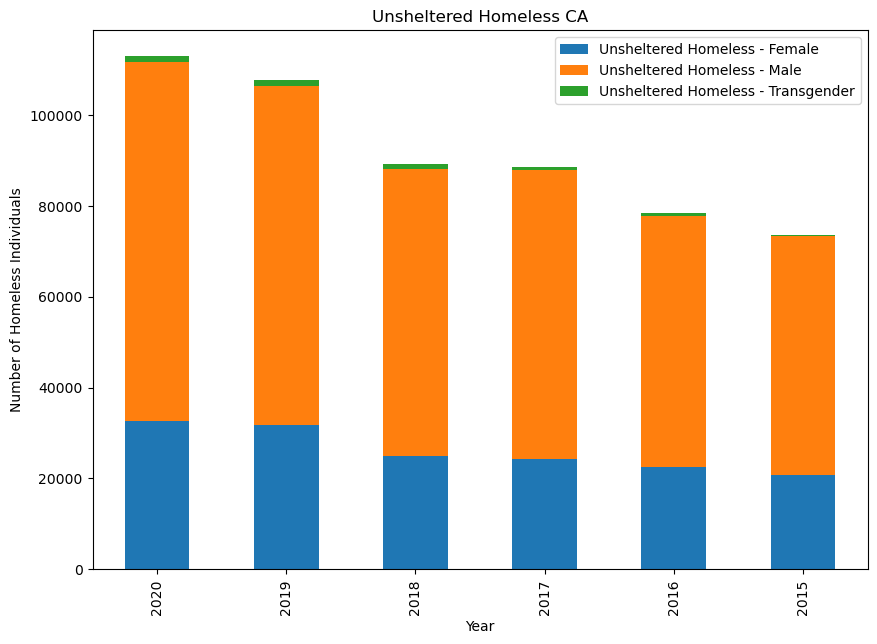

In [141]:
import matplotlib.pyplot as plt

# Select the necessary columns
gender_data_ca = ca[['State', 'Year', 'Unsheltered Homeless - Female', 'Unsheltered Homeless - Male', 'Unsheltered Homeless - Transgender']]

# Plotting the stacked bar graph
gender_data_ca.plot(kind='bar', x = 'Year',stacked=True, figsize=(10,7))
plt.title('Unsheltered Homeless CA')
plt.ylabel('Number of Homeless Individuals')
plt.xlabel('Year')
plt.show()